In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import scipy.io as sio
import datetime
import gsw
import matplotlib.dates as mdates
from matplotlib import image
import matplotlib.ticker as tick
import matplotlib.cm as cm
from matplotlib.gridspec import GridSpec
# from windrose import WindroseAxes 
%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
from sklearn.linear_model import LinearRegression

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
# Datos de viento se encuentran en hora local
df2 = pd.read_table('C://Users//dhann//OneDrive - Universidad Técnica Federico Santa María//Documents//Magister//Estuario Pescadero//meteorological_station//raw//CR200Series_sixmin_pescadero_20120301.dat', sep=",", header=[1, 2, 3])
df2 = pd.DataFrame(df2.values, columns = ['TIMESTAMP','RECORD','Speed','Direction','Winddir_D2','airTC','RH'])
df2 = df2.set_index('TIMESTAMP')
df3 = pd.read_table('C://Users//dhann//OneDrive - Universidad Técnica Federico Santa María//Documents//Magister//Estuario Pescadero//meteorological_station//raw//CR200Series_sixmin_pescadero_20120419.dat', sep=",", header=[1, 2, 3])
df3 = pd.DataFrame(df3.values, columns = ['TIMESTAMP','RECORD','Speed','Direction','Winddir_D2','airTC','RH'])
df3 = df3.set_index('TIMESTAMP')
w = pd.concat([df2, df3], ignore_index=False, sort=False)
w.index = pd.to_datetime(w.index)
w

,RECORD,Speed,Direction,Winddir_D2,airTC,RH
TIMESTAMP,,,,,,
2011-10-27 15:42:00,0,1.266242,303.5512,3.733612,13.95036,91.98724
2011-10-27 15:48:00,1,2.487294,306.1161,4.717835,14.01408,90.97228
2011-10-27 15:54:00,2,2.683839,305.5775,3.423693,13.95633,91.72778
2011-10-27 16:00:00,3,2.955789,307.1723,3.009408,13.90469,92.54127
2011-10-27 16:06:00,4,2.432306,311.2245,4.555173,13.86476,91.61178
...,...,...,...,...,...,...
2012-04-19 11:36:00,11729,3.590883,329.3365,13.33021,-24.21321,6.12943
2012-04-19 11:42:00,11730,3.712839,317.5367,7.626958,-22.60505,5.628819
2012-04-19 11:48:00,11731,4.347933,322.0573,3.083419,-25.99486,4.462762


### Raw data

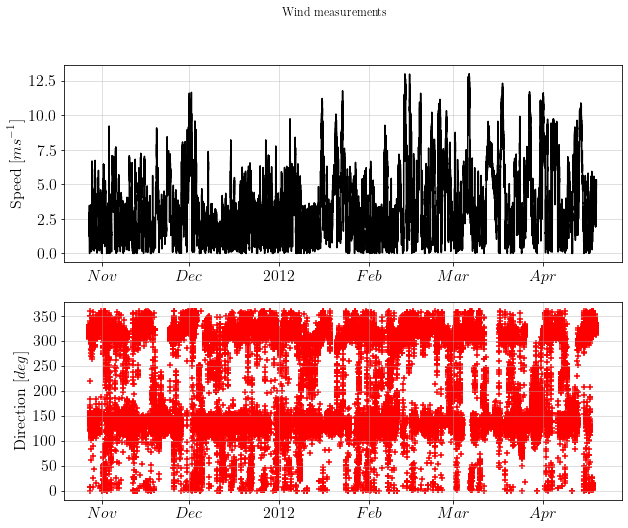

In [4]:
locator1 = mdates.AutoDateLocator()
formatter1 = mdates.ConciseDateFormatter(locator1)

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 8))
fig.suptitle('Wind measurements')

ax1.plot(w.index, w['Speed'], 'k');
ax1.set_ylabel(r"Speed "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax1.grid(alpha=0.5)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)

ax2.scatter(w.index, w['Direction'], c ='r', marker='+');
ax2.set_ylabel(r"Direction "
          r"$\displaystyle[deg]$",
          fontsize=16)
ax2.grid(alpha=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax1.xaxis.set_major_locator(locator1)
ax1.xaxis.set_major_formatter(formatter1)
ax2.xaxis.set_major_locator(locator1)
ax2.xaxis.set_major_formatter(formatter1)

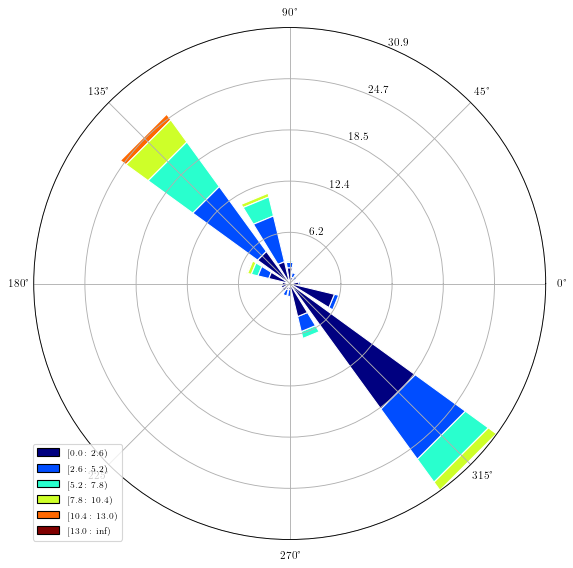

In [5]:
ax = WindroseAxes.from_ax()
ax.bar(w.Direction, w.Speed, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

In [5]:
north_w = np.float64(w['Speed'])*np.sin(np.pi*np.float64(w['Direction'])/180)#Transformación de coord
east_w = np.float64(w['Speed'])*np.cos(np.pi*np.float64(w['Direction'])/180)#Transformación de coord
north_w = pd.DataFrame(data=north_w, columns=['viento']) #Convirtiendo datos a Pandas DataFrame
east_w = pd.DataFrame(data=east_w, columns=['viento']) #Convirtiendo datos a Pandas DataFrame

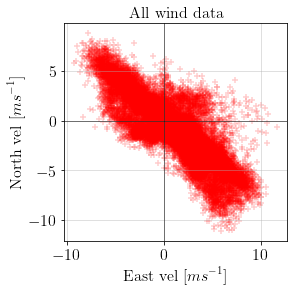

In [7]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(4, 4))

ax1.scatter(east_w['viento'], north_w['viento'], c='r', marker='+', alpha=0.2);
ax1.set_ylabel(r"North vel "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax1.set_xlabel(r"East vel "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax1.set_title(r"All wind data",
          fontsize=16)
ax1.grid(alpha=0.5)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

Solo nos centraremos entre las fechas 1/2/12 y 30/3/12

In [6]:
wd = w.loc[datetime.date(2012,2,1):datetime.datetime(2012,3,8)]

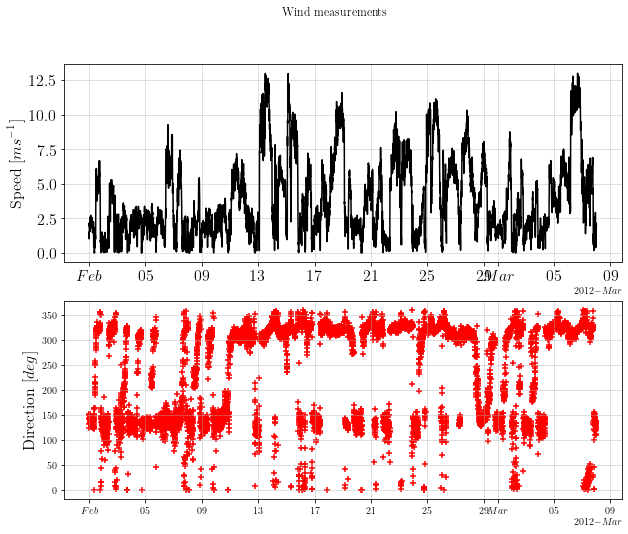

In [9]:
locator1 = mdates.AutoDateLocator()
formatter1 = mdates.ConciseDateFormatter(locator1)

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 8))
fig.suptitle('Wind measurements')

ax1.plot(wd.index, wd['Speed'], 'k');
ax1.set_ylabel(r"Speed "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax1.grid(alpha=0.5)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)

ax2.scatter(wd.index, wd['Direction'], c ='r', marker='+');
ax2.set_ylabel(r"Direction "
          r"$\displaystyle[deg]$",
          fontsize=16)
ax2.grid(alpha=0.5)

ax1.xaxis.set_major_locator(locator1)
ax1.xaxis.set_major_formatter(formatter1)
ax2.xaxis.set_major_locator(locator1)
ax2.xaxis.set_major_formatter(formatter1)

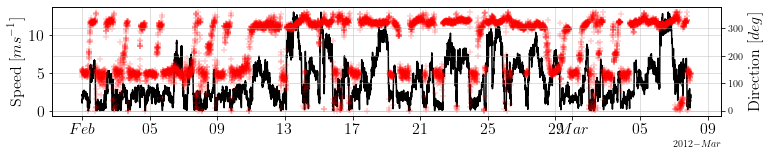

In [10]:
locator1 = mdates.AutoDateLocator()
formatter1 = mdates.ConciseDateFormatter(locator1)

fig, (ax1) = plt.subplots(nrows=1, figsize=(12, 2))
ax1.plot(wd.index, wd['Speed'], 'k');
ax1.set_ylabel(r"Speed "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax1.grid(alpha=0.5)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)

ax2 = ax1.twinx()
ax2.scatter(wd.index, wd['Direction'], c ='r', marker='+', alpha=0.2);
ax2.set_ylabel(r"Direction "
          r"$\displaystyle[deg]$",
          fontsize=16)
ax2.grid(alpha=0.5)


ax1.xaxis.set_major_locator(locator1)
ax1.xaxis.set_major_formatter(formatter1)

Para observar mejor como se comportan las direcciones se grafica una rosa de los vientos

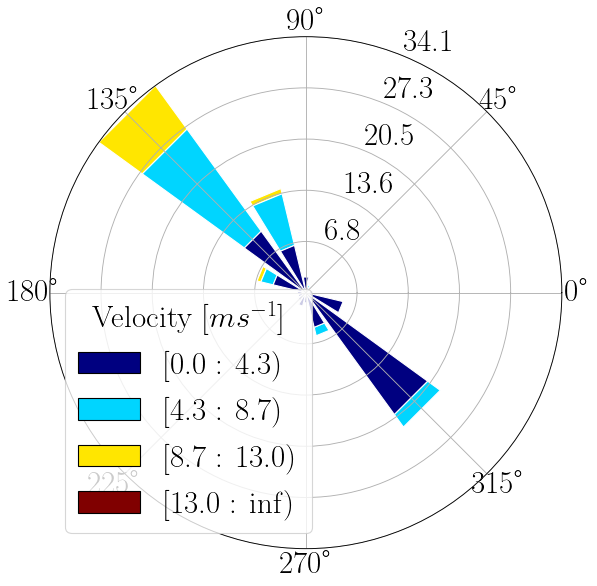

In [11]:

ax = WindroseAxes.from_ax()
ax.bar(wd.Direction, wd.Speed, normed=True, opening=0.8, bins=4, edgecolor='white', blowto=False)
ax.legend(loc='lower left', title='Velocity $[ms^{-1}]$', title_fontsize=28, fontsize=28 )
ax.xaxis.set_tick_params(labelsize=28)
ax.yaxis.set_tick_params(labelsize=28)

Se observa que el viento es principalmente bidireccional, por lo que se procede a trasformar los datos a coordenadas east-north para encontrar su velocidad principal

In [7]:
north_wd = np.float64(wd['Speed'])*np.sin(np.pi*np.float64(wd['Direction'])/180)#Transformación de coord
east_wd = np.float64(wd['Speed'])*np.cos(np.pi*np.float64(wd['Direction'])/180)#Transformación de coord
north_wd = pd.DataFrame(data=north_wd, columns=['viento']) #Convirtiendo datos a Pandas DataFrame
east_wd = pd.DataFrame(data=east_wd, columns=['viento']) #Convirtiendo datos a Pandas DataFrame

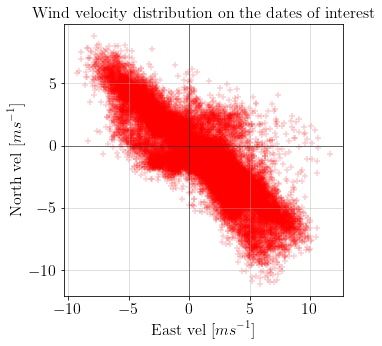

In [13]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(5, 5))

ax1.scatter(east_w['viento'], north_w['viento'], c='r', marker='+', alpha=0.2);
ax1.set_ylabel(r"North vel "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax1.set_xlabel(r"East vel "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax1.set_title(r"Wind velocity distribution on the dates of interest",
          fontsize=16)
ax1.grid(alpha=0.5)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

Sacar dirección de máxima varianza

In [11]:
Xd = east_wd.values[~np.isnan(east_wd.values)].reshape(-1, 1) #Eliminar Nan
yd = north_wd.values[~np.isnan(north_wd.values)].reshape(-1, 1) #Eliminar Nan

regd = LinearRegression().fit(Xd, yd) #Realizar ajuste
y_predd = regd.predict(Xd) #Regresión lineal
           
print(regd.intercept_)
print(regd.coef_)

[-0.23512764]
[[-0.75523706]]


In [12]:
coef = regd.coef_
angulo = 180*np.arctan(-coef)/np.pi
print(180*np.arctan(-coef)/np.pi)

[[37.06145485]]


In [22]:
coef_currents = -1.13493621
angulo_currents = 180*np.arctan(-coef_currents)/np.pi
print(180*np.arctan(-coef_currents)/np.pi)

48.61650391447975


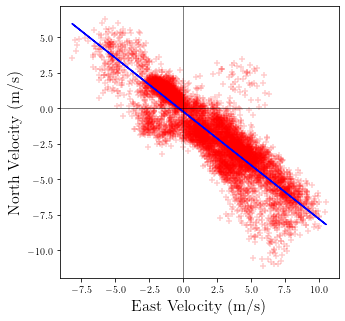

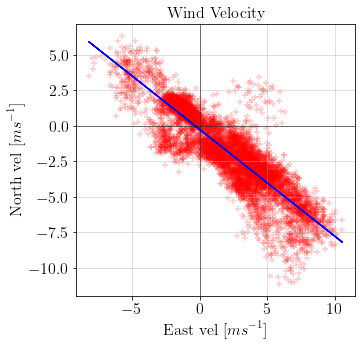

In [33]:
fig, (ax1) = plt.subplots(figsize=(5, 5))

ax1.scatter(Xd, yd, c='r', marker='+', alpha=0.2)
ax1.plot(Xd,y_predd, c='b')
ax1.set_xlabel(r"East Velocity (m/s)",fontsize=16)
ax1.set_ylabel(r"North Velocity (m/s)",fontsize=16)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)


fig, (ax1) = plt.subplots(ncols=1, figsize=(5, 5))

ax1.scatter(Xd, yd, c='r', marker='+', alpha=0.2)
ax1.plot(Xd,y_predd, c='b')
ax1.set_ylabel(r"North vel "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax1.set_xlabel(r"East vel "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
# ax1.set_title(r"$\theta = $ " + str(angulo[0,0]) + "$^o$",
#           fontsize=16)
ax1.set_title("Wind Velocity",
          fontsize=16)
ax1.grid(alpha=0.5)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

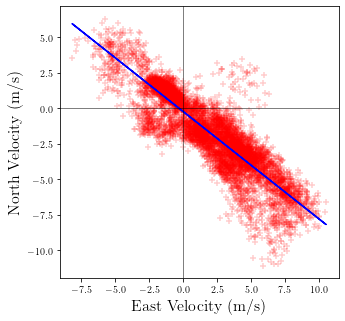

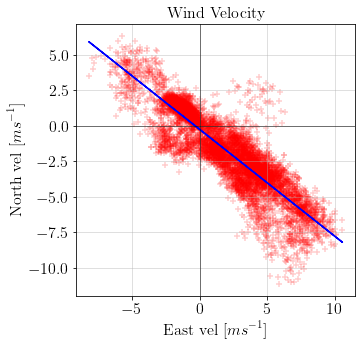

In [14]:
fig, (ax1) = plt.subplots(figsize=(5, 5))

ax1.scatter(Xd, yd, c='r', marker='+', alpha=0.2)
ax1.plot(Xd,y_predd, c='b')
ax1.set_xlabel(r"East Velocity (m/s)",fontsize=16)
ax1.set_ylabel(r"North Velocity (m/s)",fontsize=16)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)


fig, (ax1) = plt.subplots(ncols=1, figsize=(5, 5))

ax1.scatter(Xd, yd, c='r', marker='+', alpha=0.2)
ax1.plot(Xd,y_predd, c='b')
ax1.set_ylabel(r"North vel "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax1.set_xlabel(r"East vel "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
# ax1.set_title(r"$\theta = $ " + str(angulo[0,0]) + "$^o$",
#           fontsize=16)
ax1.set_title("Wind Velocity",
          fontsize=16)
ax1.grid(alpha=0.5)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

Grafico con mapa

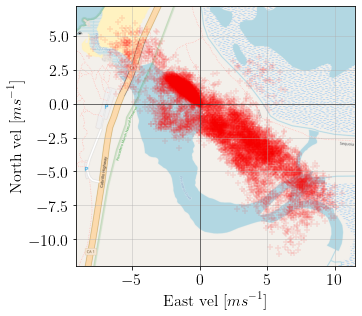

In [15]:
data = image.imread('data/map.png')

fig, (ax1) = plt.subplots(ncols=1, figsize=(5, 5))



ax1.scatter(Xd, yd, c='r', marker='+', alpha=0.1)
# ax1.plot(Xd,y_predd, c='b', alpha=0.6)
ax1.set_ylabel(r"North vel "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax1.set_xlabel(r"East vel "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
# ax1.set_title(r"$\theta = $ " + str(angulo[0,0]) + "$^o$",
#           fontsize=16)

l,r = ax1.get_xlim()
b,t = ax1.get_ylim()

ax1.imshow(data, extent=[l, r, b, t], alpha = 0.9);
ax1.grid(alpha=0.5)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16);


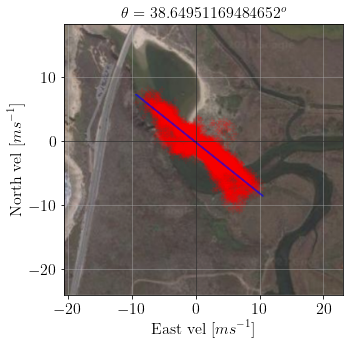

In [144]:
data = image.imread('data/mapa_pescadero.png')

fig, (ax1) = plt.subplots(ncols=1, figsize=(5, 5))



ax1.scatter(Xd, yd, c='r', marker='+', alpha=0.1)
ax1.plot(Xd,y_predd, c='b', alpha=0.6)
ax1.set_ylabel(r"North vel "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax1.set_xlabel(r"East vel "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax1.set_title(r"$\theta = $ " + str(angulo[0,0]) + "$^o$",
          fontsize=16)

l,r = ax1.get_xlim()
b,t = ax1.get_ylim()

ax1.imshow(data, extent=[l*2, r*2, b*2, t*2], alpha = 0.9);
ax1.grid(alpha=0.5)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

**Función de transformación de coordenadas**

In [16]:
def earth_to_uv(dfe, dfn, a): 
    "This takes 2 dataframes of east and north coordinates respectively and the regresion coeficient and transforms them to the direction of the coeficient"
    alpha = np.arctan(a) #Ángulo
    t, b = dfe.shape 
    M = np.array([[-np.cos(alpha), np.sin(alpha)],
                  [-np.sin(alpha), -np.cos(alpha)]]) #Matriz de transfomación
    columns = dfe.columns
    u = np.zeros((0,t)) #Inicialización de variables
    v = np.zeros((0,t)) #Inicialización de variables
    for i in columns: #Iteración sobre las columnas de los dataframes
        bin_ = np.array([[dfe[i].values],
                        [dfn[i].values]]) # Matriz de coordenadas east-north
        ui, vi = np.tensordot(M, bin_, 1) #Multiplicación matricial
        u = np.concatenate((u, ui), axis=0) #Unión de los resultados de u
        v = np.concatenate((v, vi), axis=0)#Unión de los resultados de v
    return u, v

**Dirección del viento**

In [38]:
uw, vw = earth_to_uv(east_wd, north_wd, -coef[0,0])

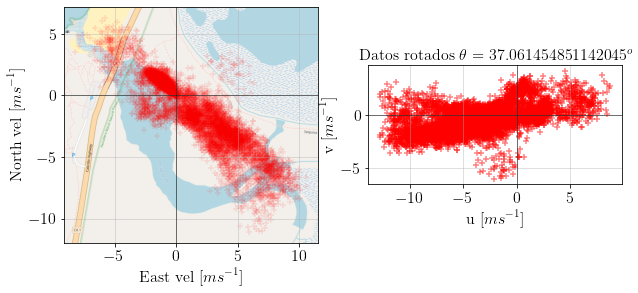

In [26]:

data = image.imread('data/map.png')
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,20))
ax2.scatter(uw[0], vw[0], c='r', marker='+', alpha=0.5)
ax2.set_ylabel(r"v "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax2.set_xlabel(r"u "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax2.set_title(r"Datos rotados $\theta = $ " + str(angulo[0,0]) + "$^o$",
          fontsize=16)
ax2.grid(alpha=0.5)
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.axvline(x=0, color='k', linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)
ax2.set_aspect('equal', 'box')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

ax1.scatter(Xd, yd, c='r', marker='+', alpha=0.1)
# ax1.plot(Xd,y_predd, c='b', alpha=0.6)
ax1.set_ylabel(r"North vel "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax1.set_xlabel(r"East vel "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
# ax1.set_title(r"$\theta = $ " + str(angulo[0,0]) + "$^o$",
#           fontsize=16)

l,r = ax1.get_xlim()
b,t = ax1.get_ylim()

ax1.imshow(data, extent=[l, r, b, t], alpha = 0.9);
ax1.grid(alpha=0.5)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

In [40]:
#Rotacion correcta?
test = (north_wd**2+east_wd**2)**0.5
test2 = (uw**2 + vw**2)**0.5
test['viento2'] = np.transpose(test2)
test
#OK

,viento,viento2
0,1.493411,1.493411
1,1.120467,1.120467
2,1.021650,1.021650
3,1.204311,1.204311
4,1.870983,1.870983
...,...,...
8634,1.375267,1.375267
8635,1.275633,1.275633
8636,1.750661,1.750661
8637,2.156000,2.156000


**Dirección del agua**

In [27]:
uw, vw = earth_to_uv(east_wd, north_wd, -coef_currents)

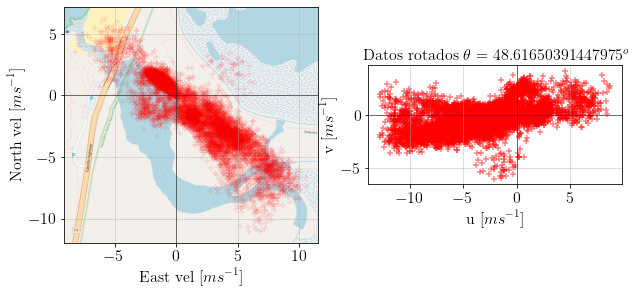

In [28]:

data = image.imread('data/map.png')
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,20))
ax2.scatter(uw[0], vw[0], c='r', marker='+', alpha=0.5)
ax2.set_ylabel(r"v "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax2.set_xlabel(r"u "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax2.set_title(r"Datos rotados $\theta = $ " + str(angulo_currents) + "$^o$",
          fontsize=16)
ax2.grid(alpha=0.5)
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.axvline(x=0, color='k', linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)
ax2.set_aspect('equal', 'box')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

ax1.scatter(Xd, yd, c='r', marker='+', alpha=0.1)
# ax1.plot(Xd,y_predd, c='b', alpha=0.6)
ax1.set_ylabel(r"North vel "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax1.set_xlabel(r"East vel "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
# ax1.set_title(r"$\theta = $ " + str(angulo[0,0]) + "$^o$",
#           fontsize=16)

l,r = ax1.get_xlim()
b,t = ax1.get_ylim()

ax1.imshow(data, extent=[l, r, b, t], alpha = 0.9);
ax1.grid(alpha=0.5)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

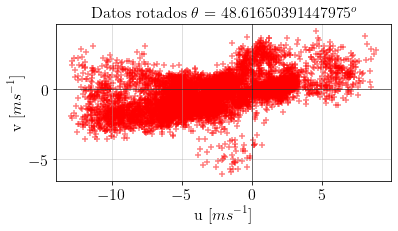

In [24]:
fig, (ax1) = plt.subplots()
ax1.scatter(uw[0], vw[0], c='r', marker='+', alpha=0.5)
ax1.set_ylabel(r"v "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax1.set_xlabel(r"u "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax1.set_title(r"Datos rotados $\theta = $ " + str(angulo_currents) + "$^o$",
          fontsize=16)
ax1.grid(alpha=0.5)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)
ax1.set_aspect('equal', 'box')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

In [ ]:
#Rotacion correcta?
test = (north_wd**2+east_wd**2)**0.5
test2 = (uw**2 + vw**2)**0.5
test['viento2'] = np.transpose(test2)
test
#OK

,viento,viento2
0,1.493411,1.493411
1,1.120467,1.120467
2,1.021650,1.021650
3,1.204311,1.204311
4,1.870983,1.870983
...,...,...
8634,1.375267,1.375267
8635,1.275633,1.275633
8636,1.750661,1.750661
8637,2.156000,2.156000


In [41]:
wind_data1 = w.loc[datetime.date(2012,2,17):datetime.date(2012,2,22)] #Selección primer grupo de datos
wind_data2 = w.loc[datetime.date(2012,2,26):datetime.date(2012,3,4)] #Selección segundo grupo de datos

north_w1 = np.float64(wind_data1['Speed'])*np.sin(np.pi*np.float64(wind_data1['Direction'])/180)#Transformación de coord
east_w1 = np.float64(wind_data1['Speed'])*np.cos(np.pi*np.float64(wind_data1['Direction'])/180)#Transformación de coord
north_w1 = pd.DataFrame(data=north_w1, columns=['viento']) #Convirtiendo datos a Pandas DataFrame
east_w1 = pd.DataFrame(data=east_w1, columns=['viento']) #Convirtiendo datos a Pandas DataFrame

north_w2 = np.float64(wind_data2['Speed'])*np.sin(np.pi*np.float64(wind_data2['Direction'])/180)#Transformación de coord
east_w2 = np.float64(wind_data2['Speed'])*np.cos(np.pi*np.float64(wind_data2['Direction'])/180)#Transformación de coord
east_w2 = pd.DataFrame(data=east_w2, columns=['viento']) #Convirtiendo datos a Pandas DataFrame
north_w2 = pd.DataFrame(data=north_w2, columns=['viento']) #Convirtiendo datos a Pandas DataFrame

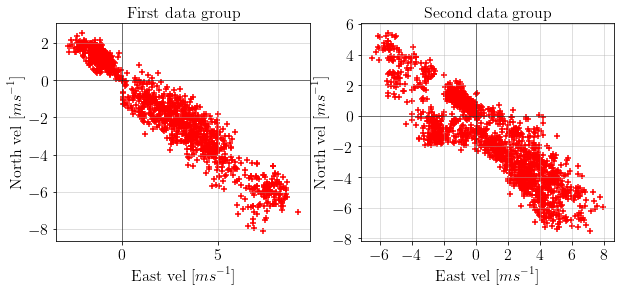

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

ax1.scatter(east_w1['viento'], north_w1['viento'], c='r', marker='+');
ax1.set_ylabel(r"North vel "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax1.set_xlabel(r"East vel "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax1.set_title(r"First data group",
          fontsize=16)
ax1.grid(alpha=0.5)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)

ax2.scatter(east_w2['viento'], north_w2['viento'], c ='r', marker='+');
ax2.set_ylabel(r"North vel " 
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax2.set_xlabel(r"East vel "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax2.set_title(r"Second data group",
          fontsize=16)
ax2.grid(alpha=0.5)
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.axvline(x=0, color='k', linewidth=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

Sacar dirección de máxima varianza

In [26]:
X1 = east_w1.values[~np.isnan(east_w1.values)].reshape(-1, 1) #Eliminar Nan
y1 = north_w1.values[~np.isnan(north_w1.values)].reshape(-1, 1) #Eliminar Nan

reg1 = LinearRegression().fit(X1, y1) #Realizar ajuste
y_pred1 = reg1.predict(X1) #Regresión lineal
print(reg1.intercept_)
print(reg1.coef_)

[0.15482248]
[[-0.79742991]]


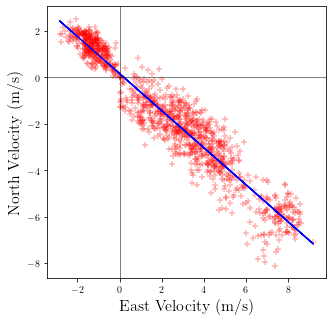

In [27]:
fig, (ax1) = plt.subplots(figsize=(5, 5))

ax1.scatter(X1, y1, c='r', marker='+', alpha=0.3)
ax1.plot(X1,y_pred1, c='b')
ax1.set_xlabel(r"East Velocity (m/s)",fontsize=16)
ax1.set_ylabel(r"North Velocity (m/s)",fontsize=16)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)

In [28]:
X2 = east_w2.values[~np.isnan(east_w2.values)].reshape(-1, 1)
y2 = north_w2.values[~np.isnan(north_w2.values)].reshape(-1, 1)

reg2 = LinearRegression().fit(X2, y2)
y_pred2 = reg2.predict(X2)
print(reg2.intercept_)
print(reg2.coef_)

[-0.75277343]
[[-0.77512449]]


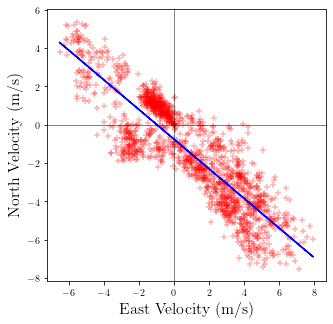

In [29]:
fig, (ax1) = plt.subplots(figsize=(5, 5))

ax1.scatter(X2, y2, c='r', marker='+', alpha=0.3)
ax1.plot(X2,y_pred2, c='b')
ax1.set_xlabel(r"East Velocity (m/s)",fontsize=16)
ax1.set_ylabel(r"North Velocity (m/s)",fontsize=16)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)

In [31]:
uw1, vw1 = earth_to_uv(east_w1, north_w1, 0.79742991)
uw2, vw2 = earth_to_uv(east_w2, north_w2, 0.77512449)

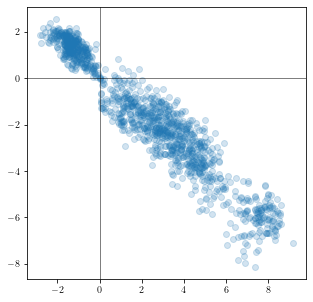

In [32]:
fig, (ax1) = plt.subplots( figsize=(5,5))
ax1.scatter(east_w1['viento'], north_w1['viento'], alpha=0.2)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)

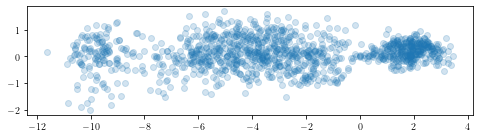

In [33]:
fig, (ax1) = plt.subplots( figsize=(8,2))
ax1.scatter(uw1[0], vw1[0], alpha=0.2)

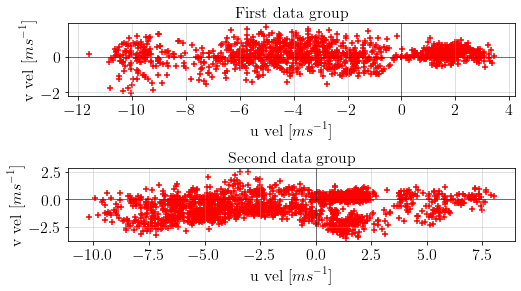

In [34]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8, 4))

ax1.scatter(uw1[0], vw1[0], c='r', marker='+');
ax1.set_ylabel(r"v vel "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax1.set_xlabel(r"u vel "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax1.set_title(r"First data group",
          fontsize=16)
ax1.grid(alpha=0.5)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)

ax2.scatter(uw2[0], vw2[0], c ='r', marker='+');
ax2.set_ylabel(r"v vel "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax2.set_xlabel(r"u vel "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax2.set_title(r"Second data group",
          fontsize=16)
ax2.grid(alpha=0.5)
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.axvline(x=0, color='k', linewidth=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

plt.subplots_adjust(hspace=1)
plt.show()

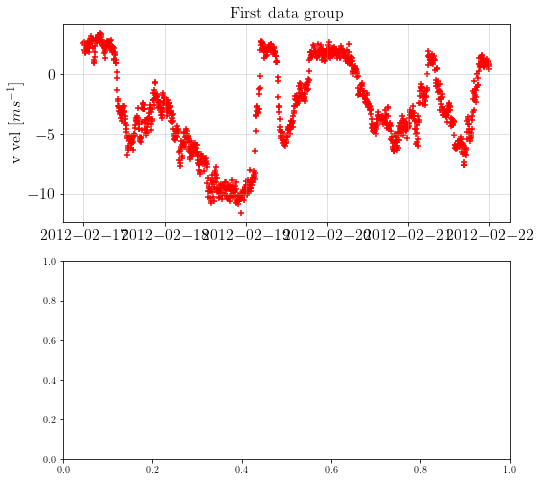

In [47]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8, 8))

ax1.scatter(wind_data1.index, uw1[0,:], c='r', marker='+');
ax1.set_ylabel(r"v vel $[ms^{-1}]$",
          fontsize=16)
ax1.set_title(r"First data group",
          fontsize=16)
ax1.grid(alpha=0.5)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)

In [46]:
uw1[0,:].shape

(1201,)